In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [7]:
df10 =pd.read_csv(r"C:\Users\pj\Downloads\Bangalore House Price Prediction\data\Processed_data\onehotdata.csv")

In [8]:
X = df10.drop(['price'],axis='columns')
y = df10.price

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [10]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5194705404524209

### Use K Fold cross validation to measure accuracy of LinearRegression model

In [11]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.46159468, 0.57787149, 0.61932374, 0.22170991, 0.50560714])

**We can see that in 5 iterations we get a score above 75% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score.**

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, error_score='raise')
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming you have X and y defined
result = find_best_model_using_gridsearchcv(X, y)
print(result)


   model  best_score                          best_params
0  ridge    0.422747                       {'alpha': 0.1}
1  lasso    0.360111  {'alpha': 1, 'selection': 'random'}


In [19]:
pred= lr_clf.predict(X_test)

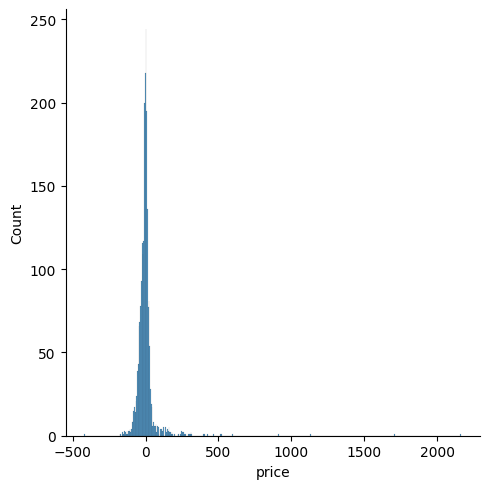

In [20]:
import seaborn as sns
sns.displot(y_test-pred)

In [21]:
plt.savefig('C:/Users/pj/Downloads/Bangalore House Price Prediction/reports/visualization/y_test-pred_plot.png')


<Figure size 640x480 with 0 Axes>